In [1]:
import torch
from torch import nn # nn contains all building blocks for neural networks
import matplotlib.pyplot as plt

# 1. Data (preparing and loading)

## Create data using linear regression

In [2]:
# Linear regression line has the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable.
weight = 0.7 # this is "b" which is also the slope
bias = 0.3 # this is "a" which is also the intercept

# Create an vector (later on this will be a tensor):
X = torch.arange(start = 0,end = 1,step = 0.02).unsqueeze(dim=1)
Y = weight * X + bias
Y.shape

torch.Size([50, 1])

## Splitting data into train and test sets
* Data for training = 80%
* Data for validating = 10-20% (Optional)
* Data for testing = 10-20%

In [3]:
split_length = int(0.8 * len(Y))
X_train, y_train = X[:split_length], Y[:split_length]
X_test, y_test = X[split_length:], Y[split_length:]

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.plot(train_data, train_labels, c="b", label="Training data")
  
  # Plot test data in green
  plt.plot(test_data, test_labels, c="g", label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

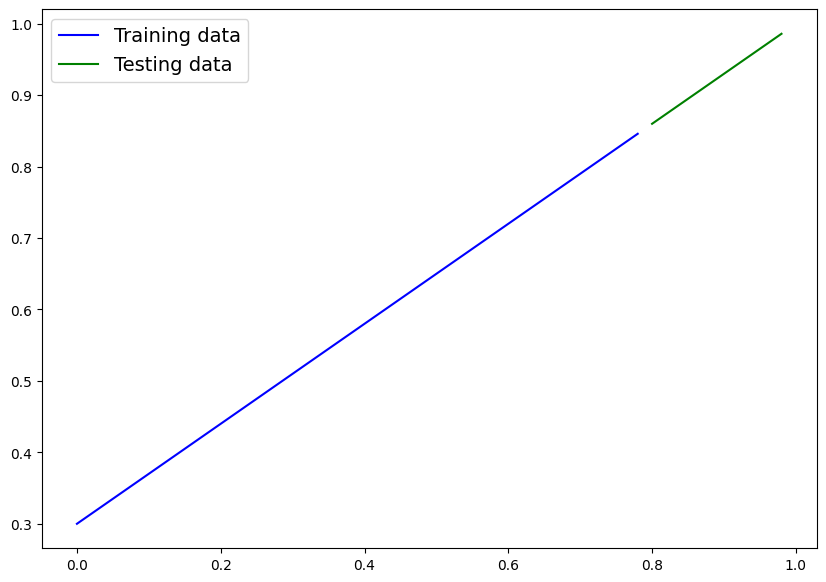

In [5]:
plot_predictions(X_train, y_train,X_test, y_test)

# 2. Build a model

In [6]:
class LinReg_model(nn.Module): # nn.Module is the base class for all neural network modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Forward method define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" là input data (dấu ":" và "->" chỉ dùng để ghi chú giống comment này)
        return self.weights * x + self.bias # The Linear Regression formular

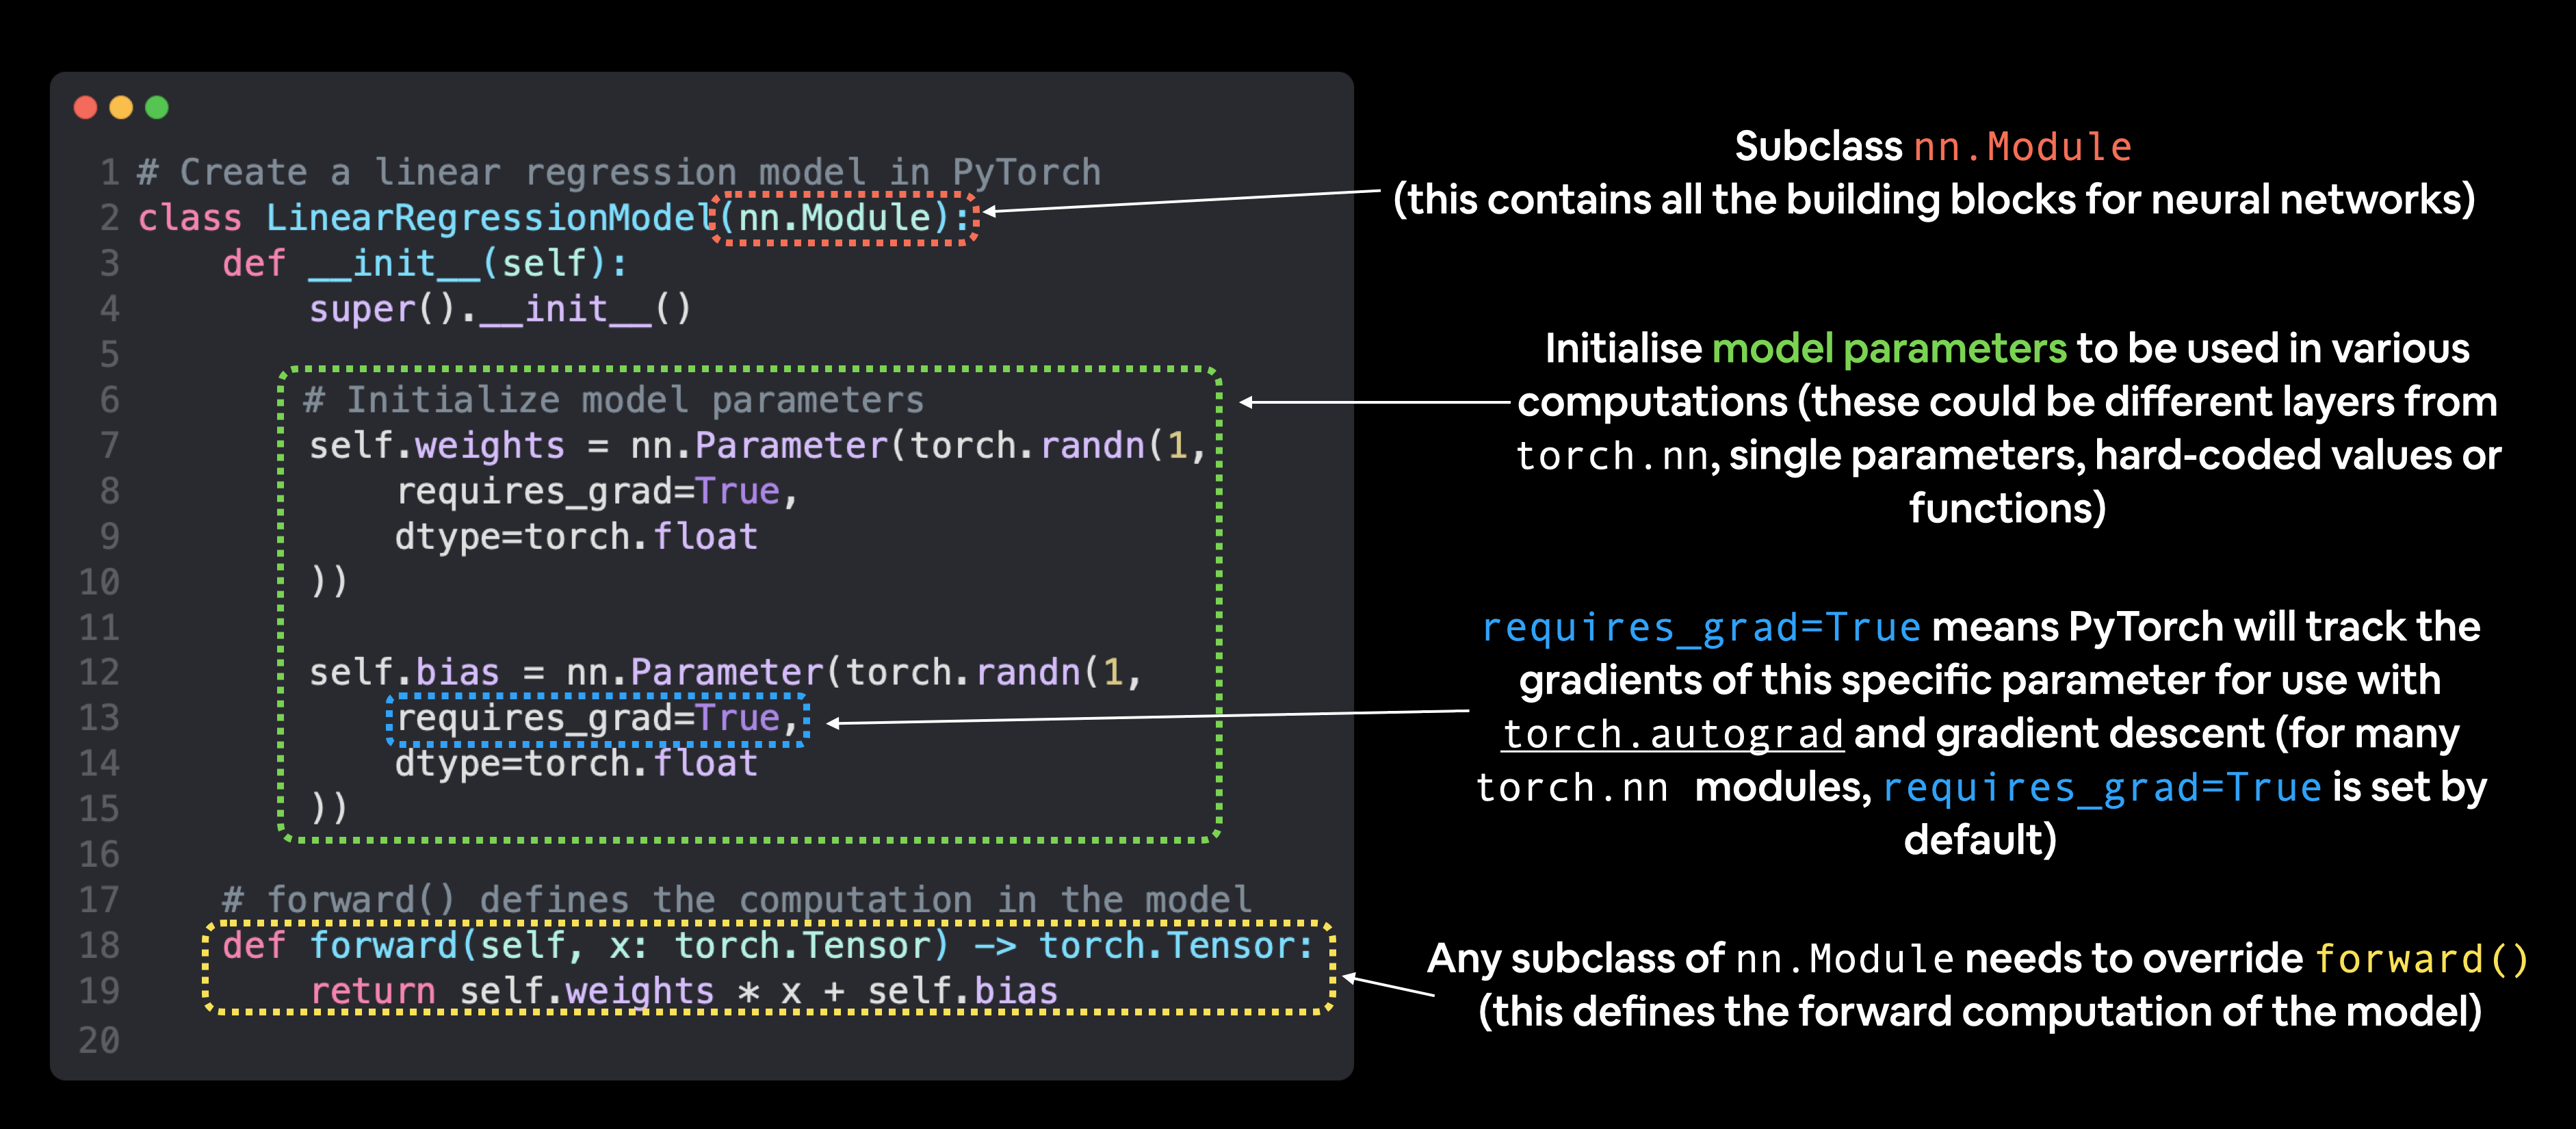

**What the model basically does:**
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

**The model does this through 2 main algorithms:**
1. Gradient descent
2. Backpropagation

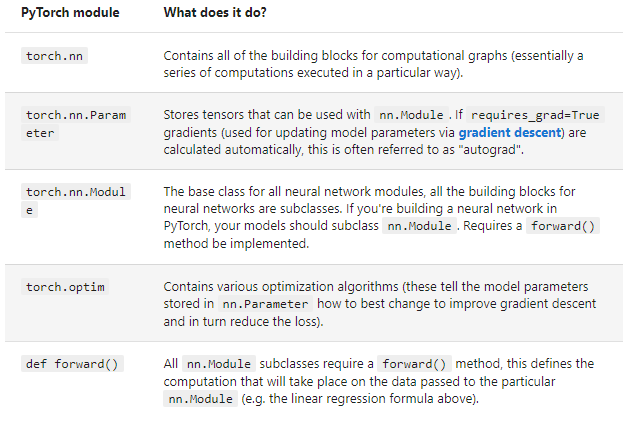

**Commonly used in the workflow:**
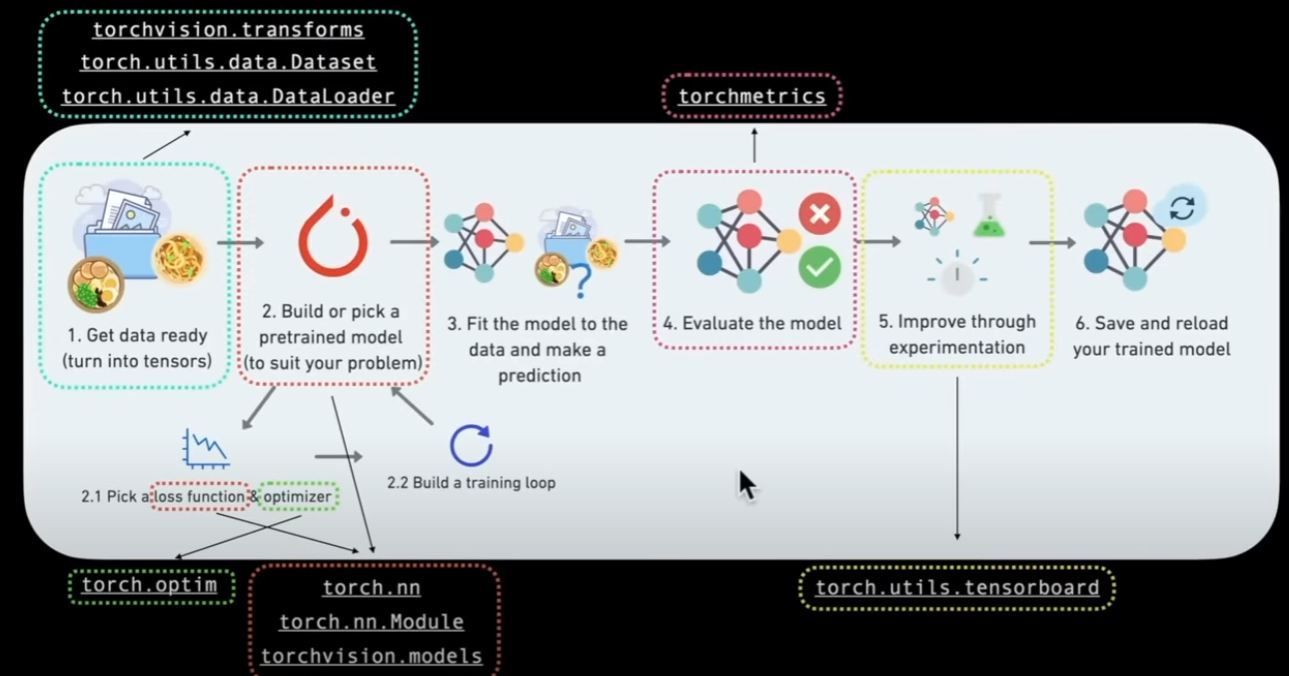

### Check out the content of our model

In [7]:
torch.manual_seed(42)
model_A = LinReg_model()

In [8]:
# Check out the parameters
list(model_A.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [9]:
# List name parameters
model_A.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [12]:
# Prediction using 'torch.inference_mode()'
with torch.inference_mode(): # use when you are certain that you won't need autograd (Use when making prediction)
    y_preds = model_A(X_test)
y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

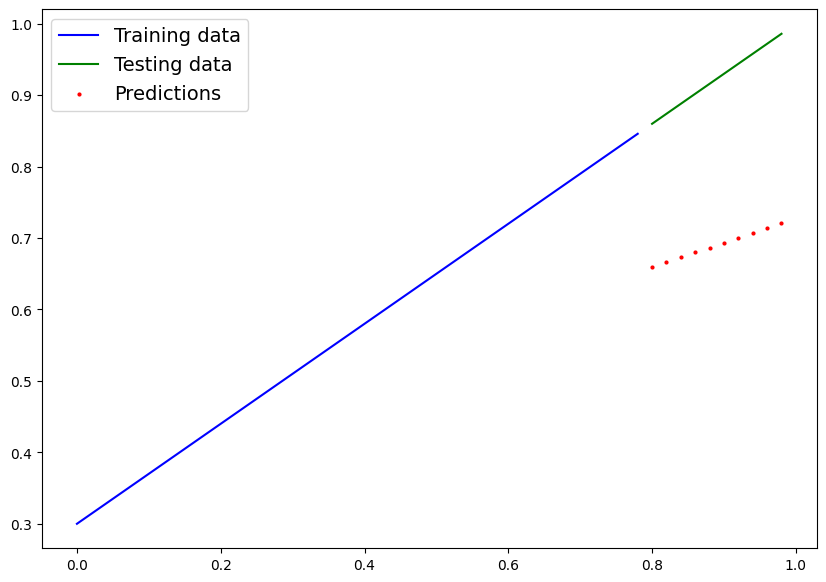

In [13]:
plot_predictions(predictions=y_preds)

**Since weight and bias are random, the prediction is wrong**

### Training a model